# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

temp_lat = []
temp_lng = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        temp_lat.append(lat_lng[0])
        temp_lng.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f"https://api.openweathermap.org/data/2.5/weather?lat={temp_lat[0]}&lon={temp_lng[0]}&appid=b244d7f82467ffc0b1fc6ed5cd09262c"
print(url)
data = requests.get(url).json()

print(data)

https://api.openweathermap.org/data/2.5/weather?lat=85.20201544189533&lon=172.30157935630325&appid=b244d7f82467ffc0b1fc6ed5cd09262c
{'coord': {'lon': 172.3016, 'lat': 85.202}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 263.25, 'feels_like': 258.84, 'temp_min': 263.25, 'temp_max': 263.25, 'pressure': 1029, 'humidity': 94, 'sea_level': 1029, 'grnd_level': 1029}, 'visibility': 8421, 'wind': {'speed': 2.2, 'deg': 229, 'gust': 2.9}, 'clouds': {'all': 100}, 'dt': 1682312438, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={temp_lat[i]}&lon={temp_lng[i]}&appid=b244d7f82467ffc0b1fc6ed5cd09262c"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        data = city_weather
        city_weather = city_weather['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
City not found. Skipping...
Processing Record 2 of Set 1 | marquelia
Processing Record 3 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
City not found. Skipping...
Processing Record 5 of Set 1 | talnakh
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 7 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
City not found. Skipping...
Processing Record 9 of Set 1 | ketchikan
City not found. Skipping...
Processing Record 10 of Set 1 | codrington
City not found. Skipping...
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | tazovsky
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 14 of Set 1 | grand falls-windsor
City not found. Skipping...
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          309
Lat           309
Lng           309
Max Temp      309
Humidity      309
Cloudiness    309
Wind Speed    309
Country       309
Date          309
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marquelia,15.9331,-98.9536,300.61,70,100,2.69,MX,1682312441
1,bethel,65.9981,-174.0768,258.61,95,41,2.46,RU,1682312448
2,necochea,-38.3876,-58.6558,284.75,91,7,3.23,AR,1682312451
3,ranohira,-22.2097,45.2400,295.42,62,0,0.61,MG,1682312452
4,qal'at bishah,19.8289,43.3066,297.67,43,8,2.79,SA,1682312456


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marquelia,15.9331,-98.9536,300.61,70,100,2.69,MX,1682312441
1,bethel,65.9981,-174.0768,258.61,95,41,2.46,RU,1682312448
2,necochea,-38.3876,-58.6558,284.75,91,7,3.23,AR,1682312451
3,ranohira,-22.2097,45.2400,295.42,62,0,0.61,MG,1682312452
4,qal'at bishah,19.8289,43.3066,297.67,43,8,2.79,SA,1682312456


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

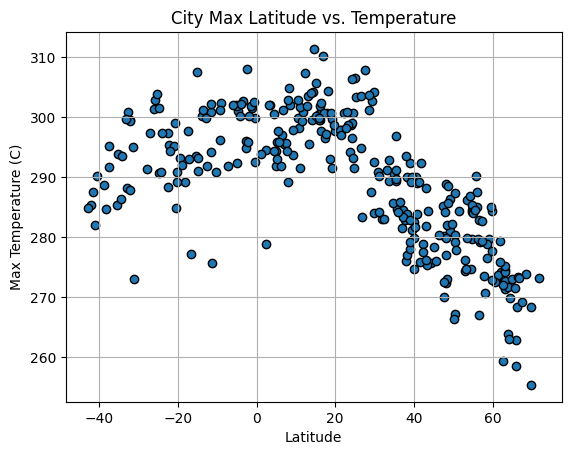

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

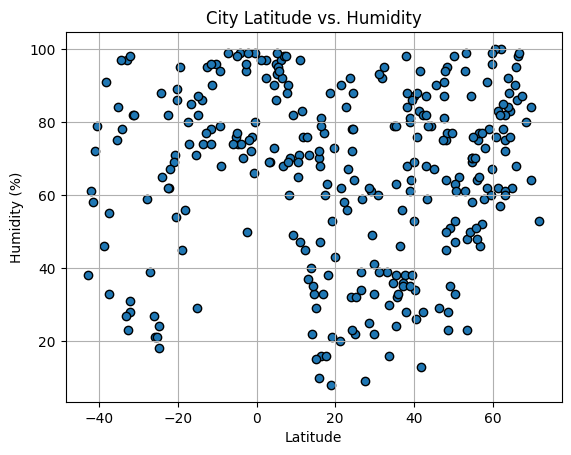

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

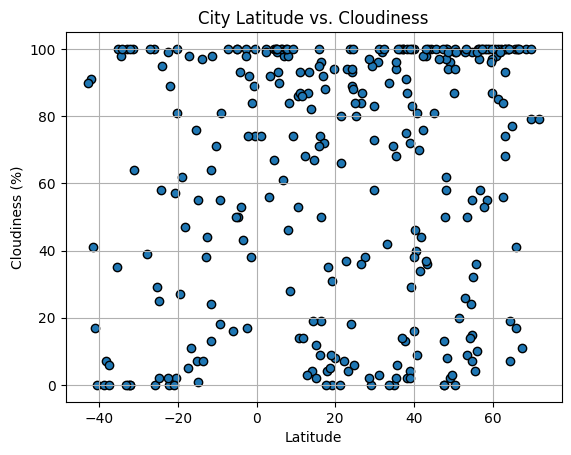

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

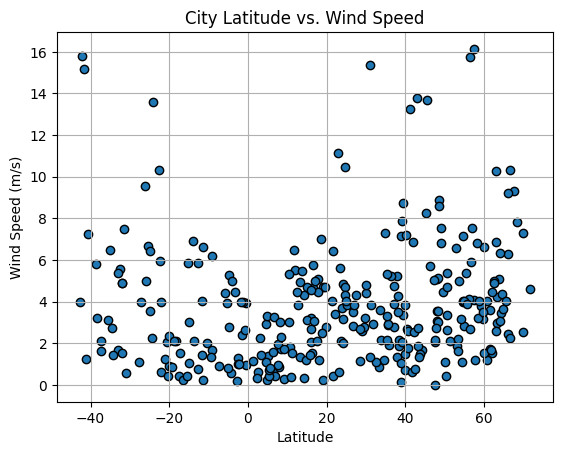

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regression_plot(x, y, x_text_axis, y_text_axis):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    plt.scatter(x, y)
    
    regression_line = slope * x + intercept
    
    plt.plot(x, regression_line, color='red')
    plt.text(x_text_axis,y_text_axis, f"y = {round(slope,2)}x + {round(intercept,2)}", color = 'red')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    print(f"The r-value is: {r_value} \n")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marquelia,15.9331,-98.9536,300.61,70,100,2.69,MX,1682312441
1,bethel,65.9981,-174.0768,258.61,95,41,2.46,RU,1682312448
4,qal'at bishah,19.8289,43.3066,297.67,43,8,2.79,SA,1682312456
6,usinsk,66.2347,59.2875,268.41,86,100,6.27,RU,1682312464
7,balmazujvaros,47.5357,21.3654,280.23,81,0,2.06,HU,1682312467


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,necochea,-38.3876,-58.6558,284.75,91,7,3.23,AR,1682312451
3,ranohira,-22.2097,45.2400,295.42,62,0,0.61,MG,1682312452
5,mahabe,-17.5245,45.7061,297.70,80,5,0.45,MG,1682312459
12,alice springs,-25.7901,135.3197,302.78,21,0,5.00,AU,1682312474
17,kualakapuas,-2.5207,114.6104,307.96,50,17,1.28,ID,1682312481


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8333579031623516 



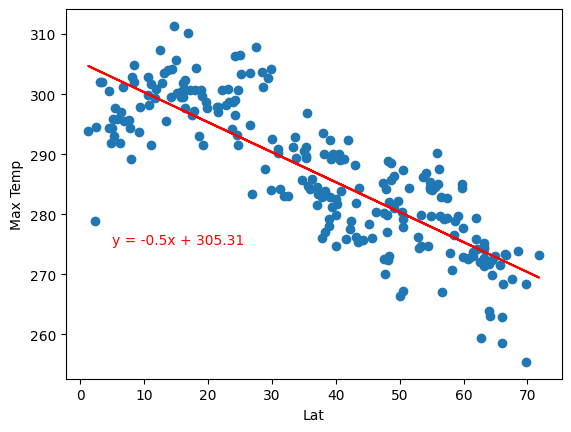

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],5 ,275)

The r-value is: 0.46955059556319495 



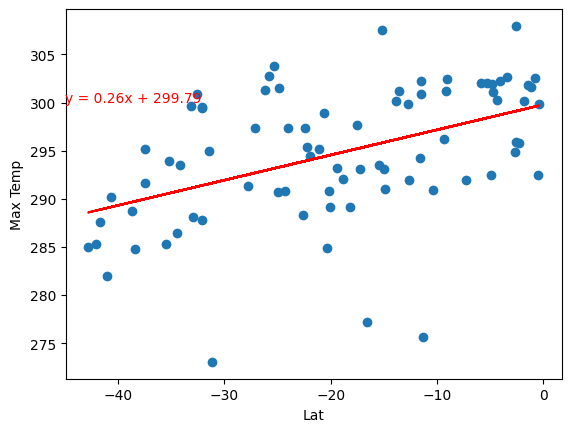

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],-45 , 300)

**Discussion about the linear relationship:** In Northern hemisphere, the temperature shows highly negative correlation indicating with increase in latitude, temperature decreases while in southern hemisphere, the temperature increase moderatly with incease in latitude

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11421189767119541 



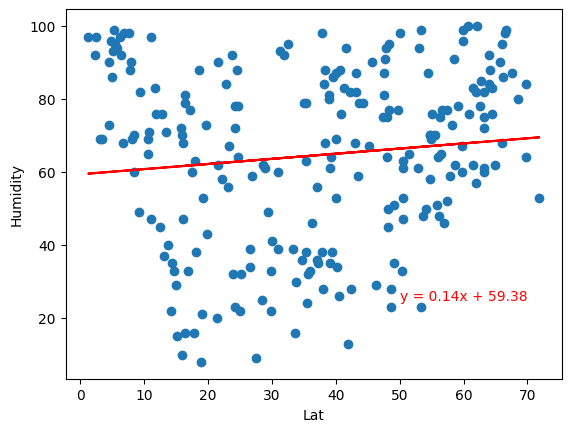

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],50 ,25)

The r-value is: 0.3902717341702832 



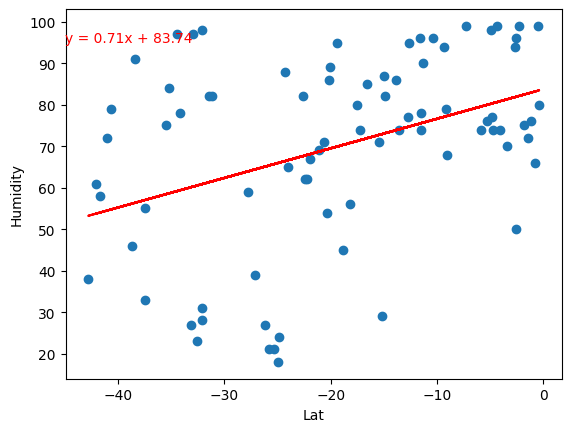

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], -45 ,95)

**Discussion about the linear relationship:** In Northern hemisphere, latitude does not show any huge difference in humidity while in southern hemisphere, increase in humidity is higher with latitude compared to northern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06164111950902085 



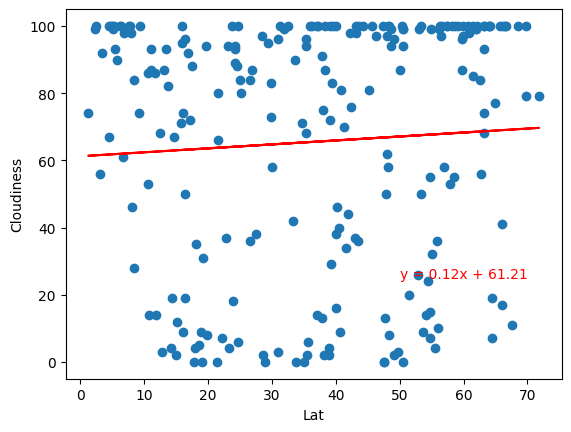

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],50 ,25)

The r-value is: 0.23151338083399656 



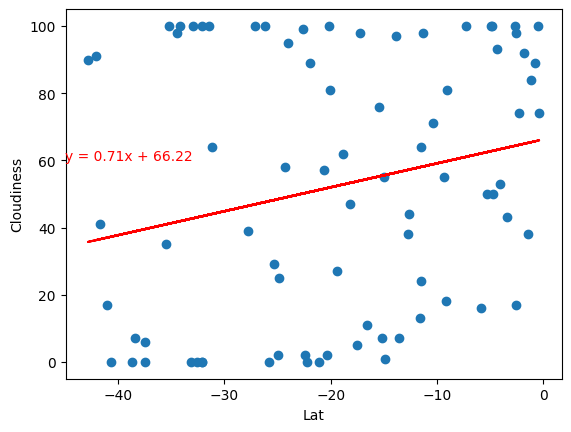

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],-45 ,60)

**Discussion about the linear relationship:** Cloudiness follows the same trend as humidity along the latitude. The southern hemisphere shows higher increase in cloudiness then northern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2941825318348637 



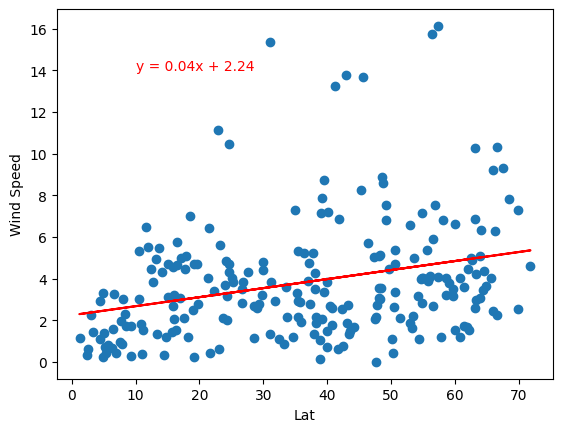

In [23]:
# Northern Hemisphere
# YOUR CODE HERE

linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],10 ,14)

The r-value is: -0.3388828290643006 



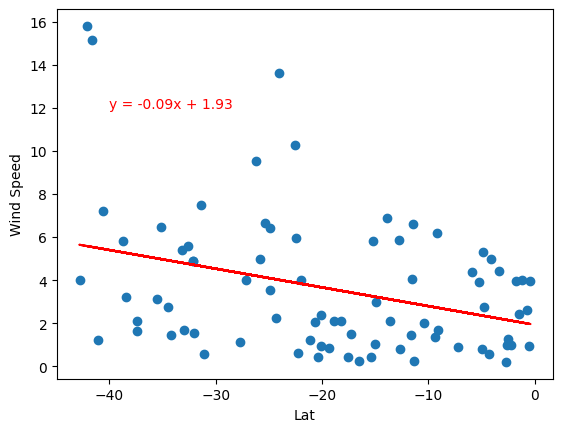

In [26]:
# Southern Hemisphere
# YOUR CODE HERE

linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],-40 ,12)

**Discussion about the linear relationship:** Wind Speed follows the opposite trend in northern and southern hemisphere but in almost same magnitude. In northern hemishpere, the wind speed increase fairly with increase in latitude while in southern hemisphere, wind speed decreases almost the same amount with increase in latitude